In [13]:
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

import tensorflow_probability as tfp

sns.reset_defaults()
sns.set_context(context='talk',font_scale=0.7)
plt.rcParams['image.cmap'] = 'viridis'

%matplotlib inline

tfd = tfp.distributions
tfb = tfp.bijectors

In [15]:
def print_subclasses_from_module(module, base_class, maxwidth=80):
    import functools, inspect, sys
    subclasses = [name for name, obj in inspect.getmembers(module)
                if inspect.isclass(obj) and issubclass(obj, base_class)]
    def red(acc, x):
        if not acc or len(acc[-1]) + len(x) + 2 > maxwidth:
            acc.append(x)
        else:
            acc[-1] += ", " + x
        return acc
    print('\n'.join(functools.reduce(red, subclasses, [])))

In [17]:
a = tf.constant(np.pi)
b = tf.constant(np.e)
with tf.GradientTape() as tape:
    tape.watch([a, b])
    c = .5 * (a**2 + b**2)
grads = tape.gradient(c, [a, b])
print(grads[0])
print(grads[1])

tf.Tensor(3.1415925, shape=(), dtype=float32)
tf.Tensor(2.7182815, shape=(), dtype=float32)


In [18]:
print_subclasses_from_module(tfp.distributions, tfp.distributions.Distribution)

Autoregressive, BatchReshape, Bernoulli, Beta, Binomial, Blockwise, Categorical
Cauchy, Chi, Chi2, Chi2WithAbsDf, ConditionalDistribution
ConditionalTransformedDistribution, Deterministic, Dirichlet
DirichletMultinomial, Distribution, Empirical, ExpRelaxedOneHotCategorical
Exponential, FiniteDiscrete, Gamma, GammaGamma, GaussianProcess
GaussianProcessRegressionModel, Geometric, Gumbel, HalfCauchy, HalfNormal
HiddenMarkovModel, Horseshoe, Independent, InverseGamma
InverseGammaWithSoftplusConcentrationRate
InverseGammaWithSoftplusConcentrationScale, InverseGaussian, JointDistribution
JointDistributionCoroutine, JointDistributionNamed, JointDistributionSequential
Kumaraswamy, LKJ, Laplace, LinearGaussianStateSpaceModel, LogNormal, Logistic
Mixture, MixtureSameFamily, Multinomial, MultivariateNormalDiag
MultivariateNormalDiagPlusLowRank, MultivariateNormalDiagWithSoftplusScale
MultivariateNormalFullCovariance, MultivariateNormalLinearOperator
MultivariateNormalTriL, MultivariateStudentTLin

In [19]:
# A standard normal
normal = tfd.Normal(loc=0., scale=1.)
print(normal)

tfp.distributions.Normal("Normal/", batch_shape=[], event_shape=[], dtype=float32)


/Users/reneaas/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


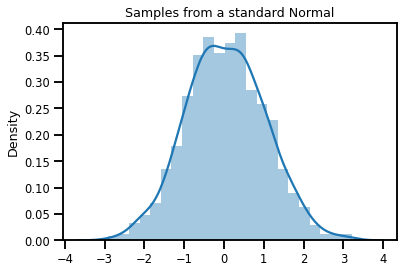

In [20]:
# Plot 1000 samples from a standard normal
samples = normal.sample(1000)
sns.distplot(samples)
plt.title("Samples from a standard Normal")
plt.show()